# Matplotlib Hist/Bar 图

<img src="https://matplotlib.org/_static/logo2_compressed.svg" width = "350" height = "200" alt="图片名称" align=center />

Matplotlib 提供了 `matplotlib.pyplot.bar` 和 `matplotlib.pyplot.hist` 两种方法来绘制**条形图**，也被称为：柱状图、Bar图、Hist图，条形图是数学统计分析中最常用的一种表达数据特征的形式；

但是两种函数提供的相关图形特征是不一样的，对于 `matplotlib.pyplot.hist` 可以通过`density` 参数的配置提供对于数据频率的计算，`matplotlib.pyplot.bar` 可以最直观地反映相关数据的特征；

<br>

**条形图**可以描述的**数据特征**是：

数据必须是二维的，可以进行数据相同维度的比较(比如：某餐馆的不同菜品的销售量，某数据中心的网络数据流量的不同协议类型的数量比较)，数据的单纯展示(比如：描述数据集中某项特征值的大小) ，可以很直观的了解数据的数量大小、变化趋势、分布差异性；

**缺点**：

+ 数据量较多时， 使用条形图来进行数据的展示容易造成混乱和不知道从哪看起的感觉；
+ 数据的量跨度较多时，使用柱状图难以很直观展示微小的数据，尤其是在数据跨度非常大(数据较为分散)的时候，不容易体现数据较小的数据；

<br>

举一个例子：

【TODO： 添加一个】


<br>



<br>

**在本教程，采用面向对象的编程方式来进行讲解，Matplotlib 的版本是： 3.4.2**

## 目录

* [1. Matplotlib.pyplot.hist 函数](#1.-Matplotlib.pyplot.hist-函数)


## 1. Matplotlib.pyplot.hist 函数

Matplotlib 提供了 [matplotlib.pyplot.hist](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html#matplotlib-pyplot-hist) 来绘制**频率直方图**；

---

`matplotlib.pyplot.hist(x, bins=None, range=None, density=False, weights=None, cumulative=False, bottom=None, histtype='bar', align='mid', orientation='vertical', rwidth=None, log=False, color=None, label=None, stacked=False, *, data=None, **kwargs)`

<br>

`Axes.hist(self, x, bins=None, range=None, density=False, weights=None, cumulative=False, bottom=None, histtype='bar', align='mid', orientation='vertical', rwidth=None, log=False, color=None, label=None, stacked=False, *, data=None, **kwargs)[source]`

---

**用途**：

+ 绘制频率直方图，可以清楚地表示出相关的数据的分布频率(在什么区间值分布数量有多少)；

<br>

**属性**：

+ `x`: 可以是一个 `Numpy.array` 类型 或者 是一个 `list` 类型 的变量，该变量存储着相关的数据；

+ `bins`: 在 Matplotlib 当中，`bins` 用来给数据进行分区，默认的值为：`plt.rcParams["hist.bins] == 0`。该值可以被设置成为：`Integer` 整形变量，在被设置成为整形变量的时候，例如：`bins=10` 代表将 `x` **划分成为10个相同宽度的区间**；<br>该值也可以被声明为一个序列（List），这个序列代表区间的含义: `bins = [1,2,3,4]` 代表将该数值区间划分成为：`[1,2) [2,3), [3,4]` 的区间，区间的默认形式是：左闭右开，但最后一个区间会全闭合，如上演示<br>`bins`也可以支持设定成为`string` 类型，该类型支持的选择变量：`'auto', 'fd', 'doane', 'scott', 'stone', 'rice', 'sturges', or 'sqrt'`；

+ `range`: Hist 直方图支持划分数据的相关范围，`range`参数控制显示数据的范围，默认的值为：`range == (x.min(),x.max())` ，是一个 二元组 类型的参数；从定义可以看出，参数生效的前提是 `x` 的类型为：`numpy.array`，因为只有`Numpy`可以迅速找到最大值、最小值；

+ `density`: 当该参数被设置成为 `True` 时，该柱状图变成频率直方图，每一个柱状的值代表：(density = counts / (sum(counts) * np.diff(bins)))；<br> 这样我们知道所有柱状图代表的面积(area)：(area = np.sum(density * np.diff(bins)) == 1)；

+ `weights`: 该参数定义了权重数组，数组的形状必须与 `x` 相同，即代表每一个值的权值，体现在频率直方图上；

+ `cumulative`: 累加，该值的相关的值为：Bool 类型，当这个值为 `True` 时，图形会最后显示总和； 当 `density` 设置为 `True` 时，最后的总和为 `1`； 当 `cumulative` 的值小于0时，叠加的方向会改变，这时如果 `density` 的值为 `True` 时，那么会对整个分布展示产生影响，第一个直方图的总和为 `1`；

+ `bottom`: array-like 类型 / scalar(标量) 类型，设定这个参数可以改变纵坐标在坐标轴上的显示位置；对于 `scalar` 类型的，整个 `Axes` 都会发生偏移，如果传入的是一个数组，那么 分组(`bins`) 会按照数组的相关数值进行区分；

+ `histtype`: 定义了频率直方图的显示直方图的类型，支持的类型为: `bar`/`barstacked`/`step`/`stepfilled`，默认的值为：`bar`；

+ `align`: 直方图的水平定义方式，支持的类型为 `left`/`mid`/`right`, 默认的值为: `mid`；

+ `orientation`: 直方图的水平定义方式，支持的类型为: `vertical`/`horizontal`，分别对应垂直和水平方式，默认为:"垂直方式" - `vertical`；

+ `rwidth`: 定义显示直方图的显示的宽度，参数的类型为: Float，默认值为：None；

+ `log`: 该值表示 频率直方图 的坐标轴刻度，默认为：False，当该值为 `True` 时，坐标轴的显示按照指数形式($10^x$)进行表示；

+ `color`: 定义单个直方图的颜色，或者指定一个值来指定所有直方图的颜色，支持的类型为: `array-like`/`string`；

+ `label`: 定义直方图的坐标上显示的标签，支持为多个数据集添加标签，但是一般只会显示一种;

+ `stacked`: 定义数据是否堆叠，默认的值为: `False`，这个值仅仅在存在多个数值的时候有效，当设定为 `True` 时，所有的数据堆叠在一起；
 

**现在我们进行代码的演示**

In [66]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

# 当前的 Matplotlib 版本为：
print("正在使用的当前的 Matplotlib 版本为: %s " %mpl.__version__)

正在使用的当前的 Matplotlib 版本为: 3.4.2 


In [2]:
# 首先我们先来打印一下有关相关的默认配置
# 了解默认的配置可以了解当前的默认参数
for rc_key in mpl.rcParams.keys():
    if "hist" in rc_key:
        print("Hist 图的默认参数有: %s  mpl.rcParams[\"%s\"]==%s" %(rc_key, rc_key, mpl.rcParams[rc_key],))

# 尝试打印一下
mpl.rcParams["hist.bins"]

Hist 图的默认参数有: hist.bins  mpl.rcParams["hist.bins"]==10


10

数据的格式为： <class 'numpy.ndarray'>
数据的规格(维度): 1
数据的大小: 10000


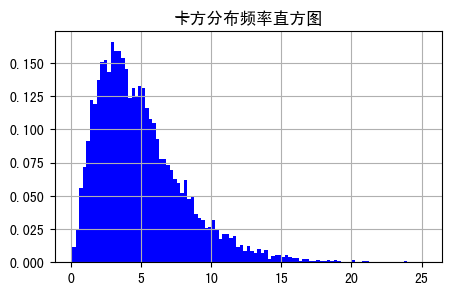

In [27]:
# 我们尝试使用 Numpy 进行绘图，因为 matplotlib.hist 函数对 numpy 的支持比较全面
# 在这里我们引用 卡方分布 的相关数据

# 显示中文字体
plt.rcParams["font.sans-serif"] = "SimHei"

# 使用 Numpy 产生随机数据
x_data = np.random.chisquare(df=(5.0,), size=(10000,))

# 打印一下 数据的格式
print("数据的格式为： %s" %type(x_data))

# 数据的规格
print("数据的规格(维度): %s" %x_data.ndim)
print("数据的大小: %s" %x_data.shape)

# 创建画布
fig = plt.figure(figsize=(5,3))

# 创建坐标轴
ax = fig.add_subplot(111)

# 为坐标轴设定标题
ax.set_title("卡方分布频率直方图")

# 显示背景网格
ax.grid(True)

# 在坐标轴上绘制 卡方分布的频率直方图
ax.hist(x=x_data, bins="sqrt", density=True, color='b')

plt.show()

需要展示的数据:
[22. 32. 42. 52.]


0.02
0.02
0.04
0.02


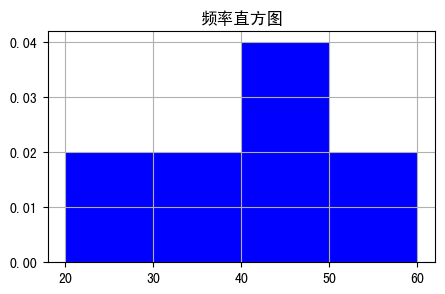

In [79]:
# 我们在这里使用代码理解一下 weights 这个参数
# 重新定义一组数值 - x_data

x_data = np.linspace(start=22,stop=52,num=4)

# 打印一下产生的数据
print("需要展示的数据:")
print(x_data)
print("\n")

# 定义权重的相关数值
weights = [1,1,2,1]

fig = plt.figure(figsize=(5,3))
ax = fig.add_subplot(111)

ax.set_title("频率直方图")
ax.grid(True)
ax.set_xticks([20,30,40,50,60])
ax.set_yticks([0.00,0.01,0.02,0.03,0.04,0.05,0.06])

# 定义区间
bins = [20,30,40,50,60]

x, bins, patches = ax.hist(x=x_data, bins=bins, density=True, weights=weights, facecolor='b')

# 打印每一个直方图的高度信息
# 我们可以看到对于 weight 值为 2 的其高度值也较大，最后频率的值也为其他的2倍；
# 但是必须明确，就是
for p in patches:
    print(p.get_height())


# 展示相关数据
plt.show()

需要展示的数据:
[22. 32. 42. 52.]


0.25
0.5
0.75
1.0


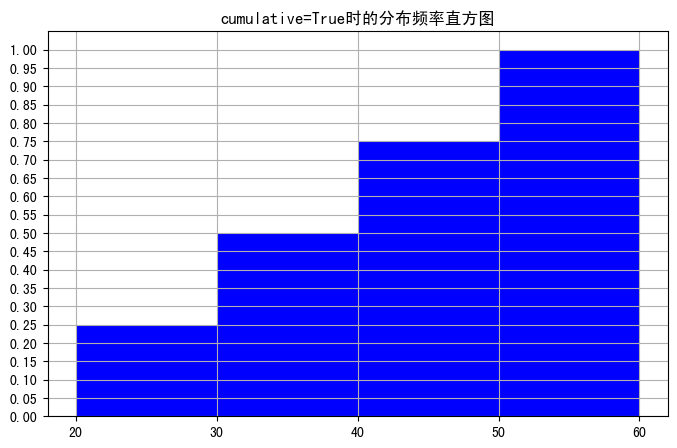

In [78]:
# 在这里我们演示一下 cumulative 的属性的展示
# 

x_data = np.linspace(start=22,stop=52,num=4)

# 打印一下产生的数据
print("需要展示的数据:")
print(x_data)
print("\n")

fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(111)

ax.set_title("cumulative=True时的分布频率直方图")
ax.grid(True)
ax.set_xticks([20,30,40,50,60])
ax.set_yticks(np.linspace(start=0.00,stop=1.0,num=21))

# 定义区间
bins = [20,30,40,50,60]

x, bins, patches = ax.hist(x=x_data, bins=bins, density=True, cumulative=True, facecolor='b')

for p in patches:
    print(p.get_height())
    
# 打印图片
plt.show()

# 我们可以发现在 cumulative=True 设置完成之后，整个值处于叠加的状态，并在最后 = 1

需要展示的数据:
[22. 32. 42. 52.]




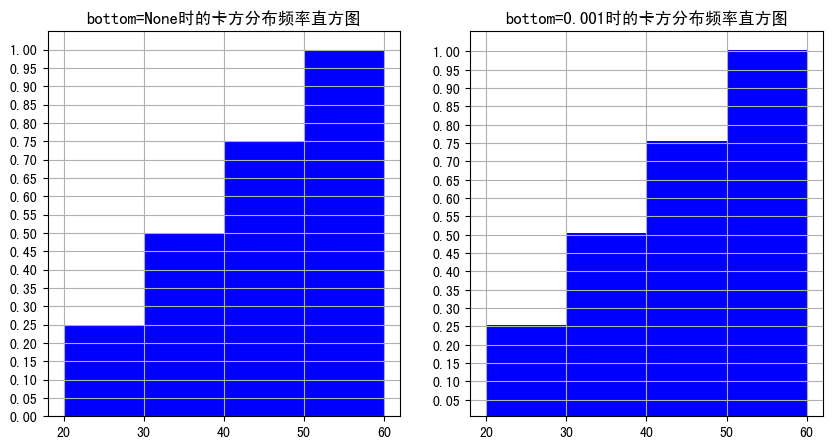

In [84]:
# 我们尝试一下 更改 Bottom 的参数

x_data = np.linspace(start=22,stop=52,num=4)

# 打印一下产生的数据
print("需要展示的数据:")
print(x_data)
print("\n")

fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(121)

ax1.set_title("bottom=None时的卡方分布频率直方图")
ax1.grid(True)
ax1.set_xticks([20,30,40,50,60])
ax1.set_yticks(np.linspace(start=0.00,stop=1.0,num=21))

# 定义区间
bins = [20,30,40,50,60]

x, bins, patches = ax1.hist(x=x_data, bins=bins, density=True, cumulative=True, facecolor='b')

ax2 = fig.add_subplot(122)
ax2.set_title("bottom=0.001时的卡方分布频率直方图")
ax2.grid(True)
ax2.set_xticks([20,30,40,50,60])
ax2.set_yticks(np.linspace(start=0.00,stop=1.0,num=21))

# 定义区间
bins = [20,30,40,50,60]

x, bins, patches = ax2.hist(x=x_data, bins=bins, density=True, cumulative=True, facecolor='b', bottom=0.005)

# 打印图片
plt.show()

# 可以看到整个图像向上

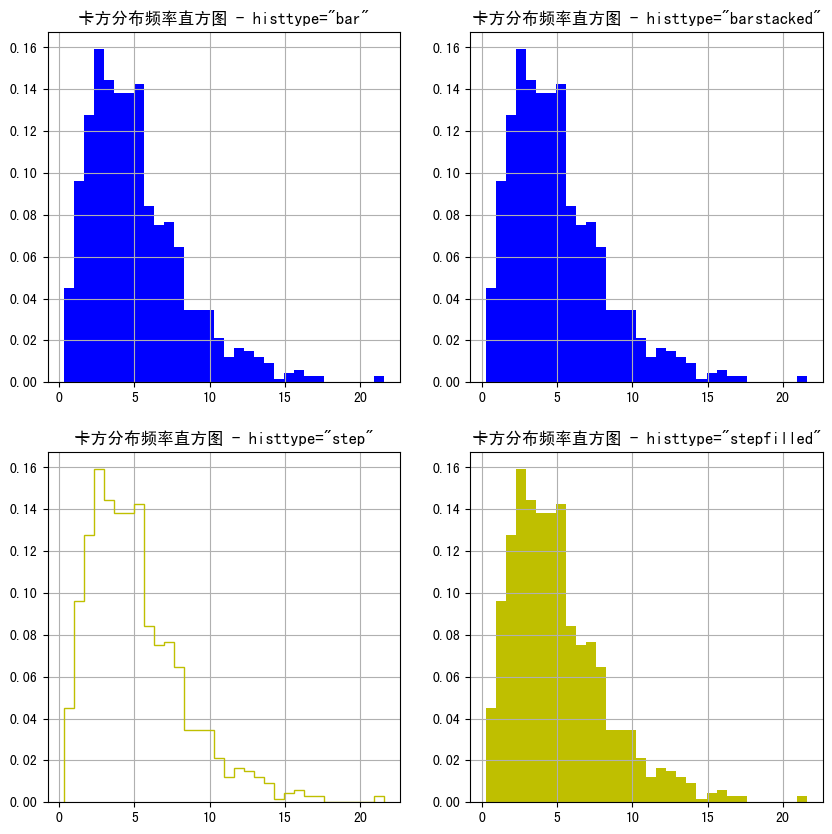

In [68]:
# 我们尝试更改一下参数：histtype 的值，打印一下相关的


np.random.seed(1234)
x_data = np.random.chisquare(df=(5.0,), size=(1000,))

# 创建新的画布
fig = plt.figure(figsize=(10,10))

# 第一张子图
ax1 = fig.add_subplot(221)
ax1.set_title("卡方分布频率直方图 - histtype=\"bar\"")
ax1.grid(True)
ax1.hist(x=x_data, bins="sqrt", density=True, color='b', histtype="bar")

# 第二张子图
ax2 = fig.add_subplot(222)
ax2.set_title("卡方分布频率直方图 - histtype=\"barstacked\"")
ax2.grid(True)
ax2.hist(x=x_data, bins="sqrt", density=True, color='b', histtype="barstacked")

# 第三张子图
ax3 = fig.add_subplot(223)
ax3.set_title("卡方分布频率直方图 - histtype=\"step\"")
ax3.grid(True)
ax3.hist(x=x_data, bins="sqrt", density=True, color='y', histtype="step")


# 第四张子图
ax4 = fig.add_subplot(224)
ax4.set_title("卡方分布频率直方图 - histtype=\"stepfilled\"")
ax4.grid(True)
ax4.hist(x=x_data, bins="sqrt", density=True, color='y', histtype="stepfilled")

plt.show()